# Built-in Plotting Methods for Raw Objects

* plot continuous data as a time series, 
* plot spectral density of continuous data, 
* sensor locations
* projectors stored in `mne.io.Raw` objects.

`mne.io.Raw` Data is cropped to  60 seconds before loading to minimum RAM usage

In [1]:
import os
import mne
%matplotlib inline

In [2]:
SAMPLE_DATA_DIR = os.path.join(os.environ["HOME"],
                           "mne_data",
                           "MNE-sample-data")

In [3]:
# sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(SAMPLE_DATA_DIR, 'MEG', 'sample',
                                    'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)
raw.crop(tmax=60).load_data()

Opening raw data file /Users/jonghang/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 36037  =      0.000 ...    60.000 secs...


<Raw | sample_audvis_raw.fif, 376 x 36038 (60.0 s), ~106.6 MB, data loaded>

`~mne.io.Raw` object have several built-in plotting methods:

- `mne.io.Raw.plot`
- `mne.io.Raw.plot_sensors`
- `mne.io.Raw.plot_projs_topomap`

Using matplotlib as 2D backend.


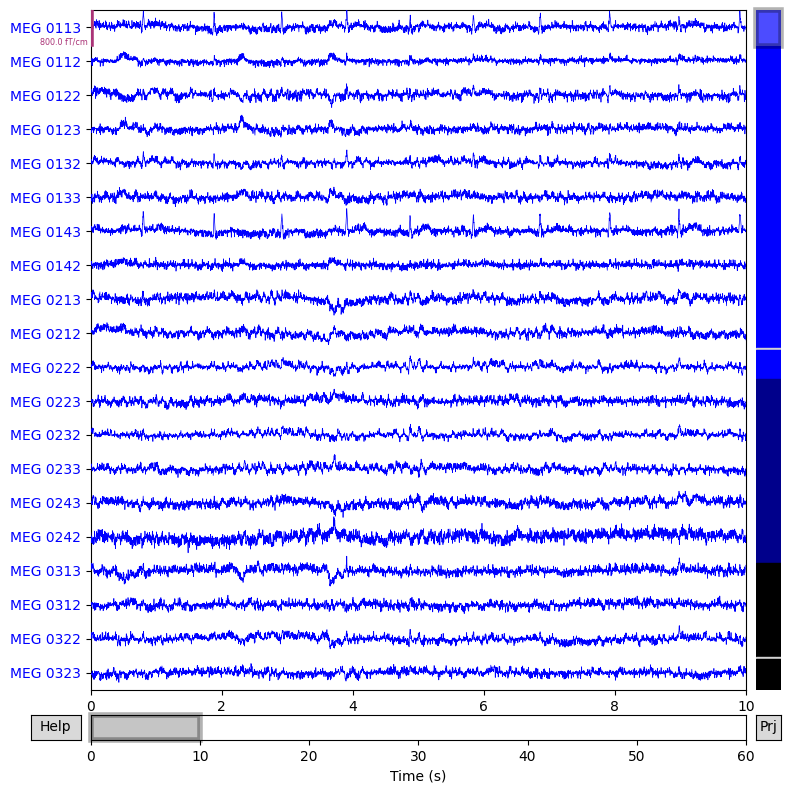

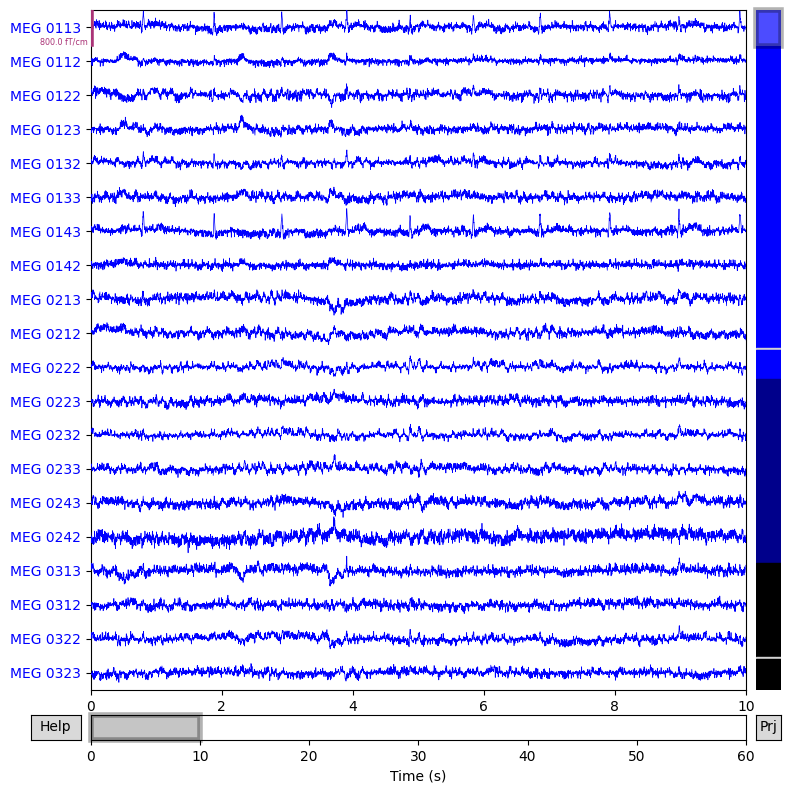

In [4]:
raw.plot()

By default, the `mne.io.Raw.plot` method generates an *interactive* plot window with several useful features:

- It spaces the channels equally along the y-axis.

  - 20 channels are shown by default; you can scroll through the channels
    using the :kbd:`↑` and :kbd:`↓` arrow keys, or by clicking on the
    colored scroll bar on the right edge of the plot.

  - The number of visible channels can be adjusted by the ``n_channels``
    parameter, or changed interactively using :kbd:`page up` and :kbd:`page
    down` keys.

  - You can toggle the display to "butterfly" mode (superimposing all
    channels of the same type on top of one another) by pressing :kbd:`b`,
    or start in butterfly mode by passing the ``butterfly=True`` parameter.

- It shows the first 10 seconds of the `mne.io.Raw` object.

  - You can shorten or lengthen the window length using :kbd:`home` and
    :kbd:`end` keys, or start with a specific window duration by passing the
    ``duration`` parameter.

  - You can scroll in the time domain using the `←` and `→` arrow keys, or start at a specific point by passing the ``start`` parameter. Scrolling using :kbd:`shift`:kbd:`→` or    `shift`:kbd:`←` scrolls a full window width at a time.

- It allows clicking on channels to mark/unmark as "bad".

  - When the plot window is closed, the `mne.io.Raw` object's ``info`` attribute will be updated, adding or removing the newly (un)marked channels to/from the `mne.Info` object's `bads` field (A.K.A. ``raw.info['bads']``).

- It allows interactive :term:`annotation <annotations>` of the raw data.

  - This allows you to mark time spans that should be excluded from future computations due to large movement artifacts, line noise, or other distortions of the signal. Annotation mode is entered by pressing `a`. See `annotations-tutorial` for details.

- It automatically applies any :term:`projectors <projector>` before plotting
  the data.

  - These can be enabled/disabled interactively by clicking the `Proj` button at the lower right corner of the plot window, or disabled by default by passing the `proj=False` parameter. See
    `tut-projectors-background` for more info on projectors.

These and other keyboard shortcuts are listed in the Help window, accessed through the ``Help`` button at the lower left corner of the plot window.  Other plot properties (such as color of the channel traces, channel order and grouping, simultaneous plotting of :term:`events`, scaling, clipping, filtering, etc.) can also be adjusted through parameters passed to the
`mne.io.Raw.plot` method; see the docstring for details.


## Plotting spectral density of continuous data

To visualize the frequency content of continuous data, the `mne.io.Raw` object provides a `mne.io.Raw.compute_psd` method to compute `spectral density`_ and the resulting `mne.time_frequency.Spectrum` object has a `mne.time_frequency.Spectrum.plot` method:

Effective window size : 0.426 (s)


/Users/jonghang/opt/anaconda3/envs/torch311/lib/python3.11/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


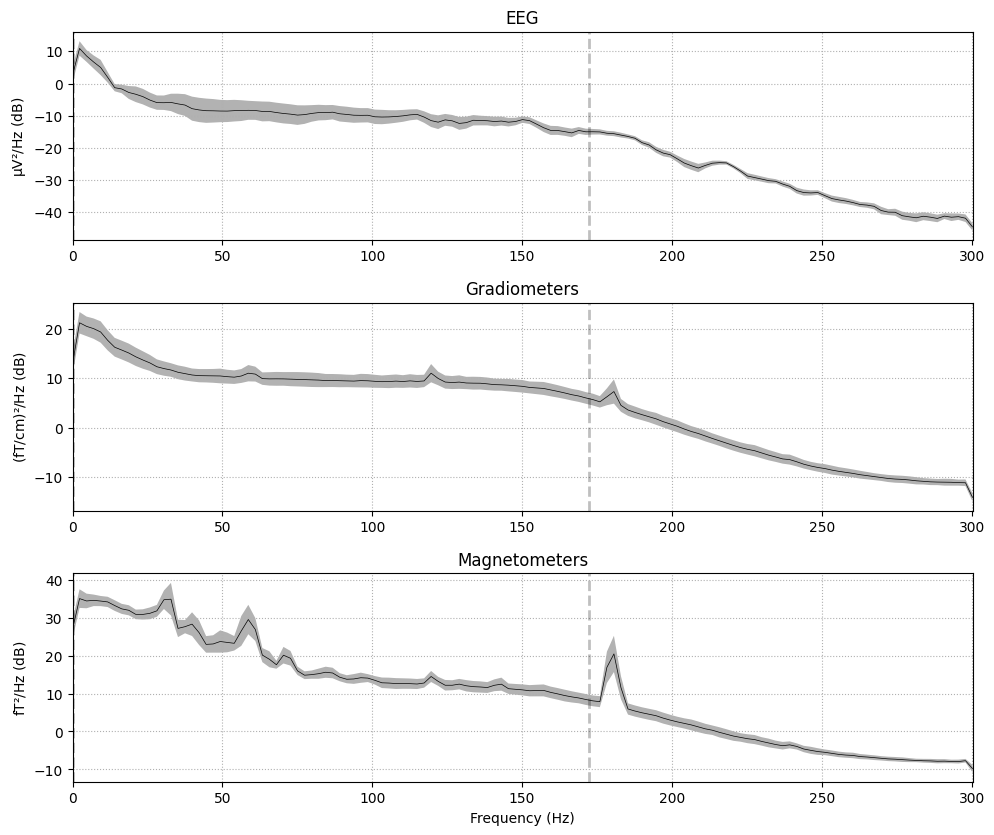

In [5]:
spectrum = raw.compute_psd()
spectrum.plot(average=True)

If the data have been filtered, vertical dashed lines will automatically indicate filter boundaries. The spectrum for each channel type is drawn in its own subplot; here we've passed the `average=True` parameter to get a summary for each channel type, but it is also possible to plot each channel individually, with options for how the spectrum should be computed,
color-coding the channels by location, and more. For example, here is a plot of just a few sensors (specified with the `picks` parameter), color-coded by spatial location (via the `spatial_colors` parameter, see the documentation of `~mne.time_frequency.Spectrum.plot` for full details):



/Users/jonghang/opt/anaconda3/envs/torch311/lib/python3.11/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


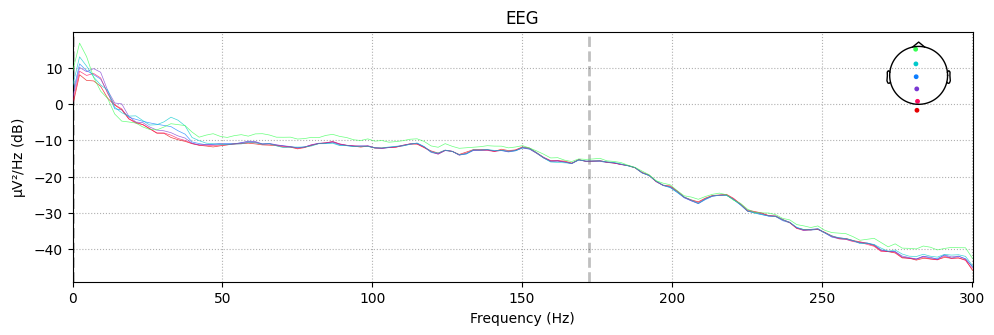

In [8]:
midline = ['EEG 002', 'EEG 012', 'EEG 030', 'EEG 048', 'EEG 058', 'EEG 060']
spectrum.plot(picks=midline)

__Plot spectral power estimates across sensors__ as a scalp topography, using the `~mne.time_frequency.Spectrum`'s `~mne.time_frequency.Spectrum.plot_topomap` method. 

The default parameters will plot five frequency bands (δ, θ, α, β, γ), will compute power based on magnetometer channels (if present), and will plot the power estimates on a dB-like log-scale:

# Plot Topomap

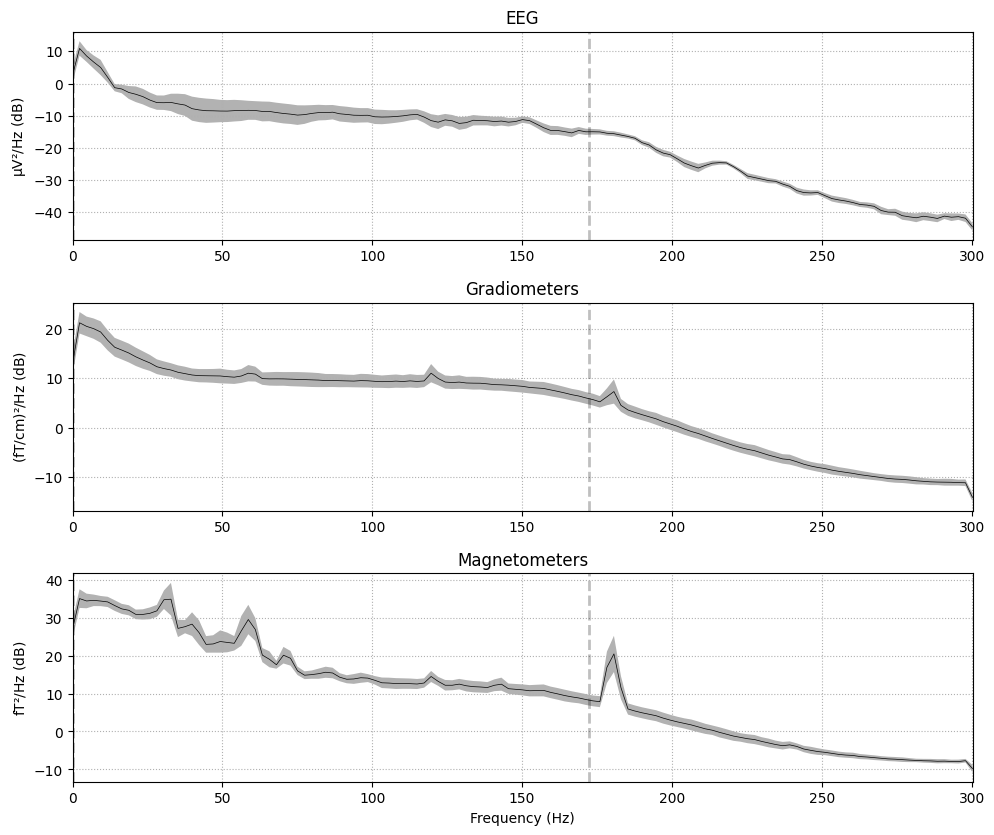

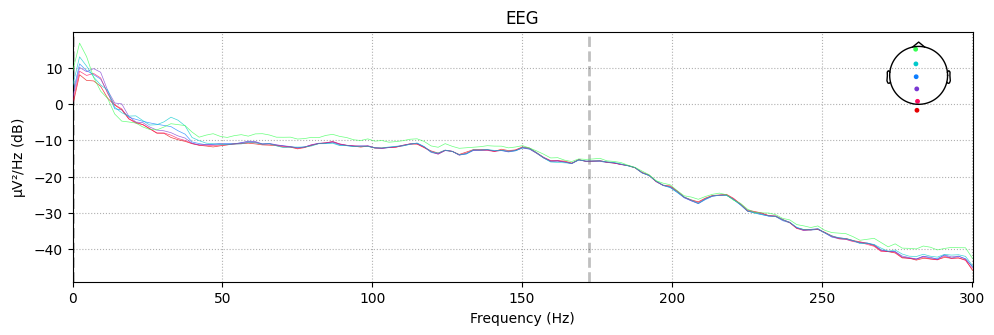

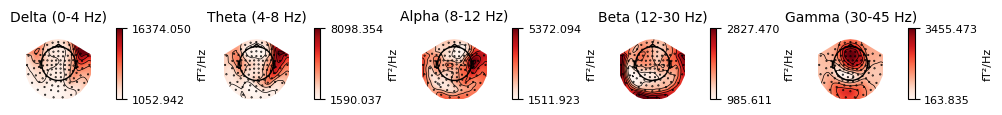

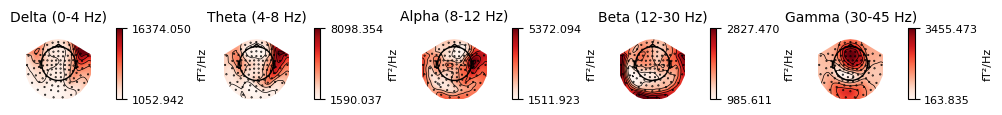

In [9]:
spectrum.plot_topomap()

Alternatively, you can plot the PSD for every sensor on its own axes, with
the axes arranged spatially to correspond to sensor locations in space, using
`~mne.time_frequency.Spectrum.plot_topo`:



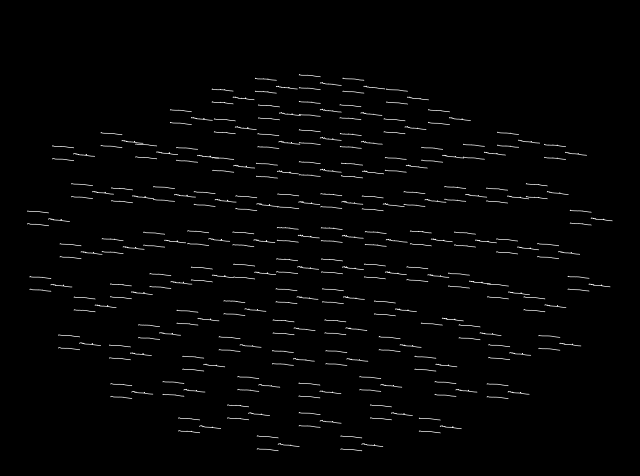

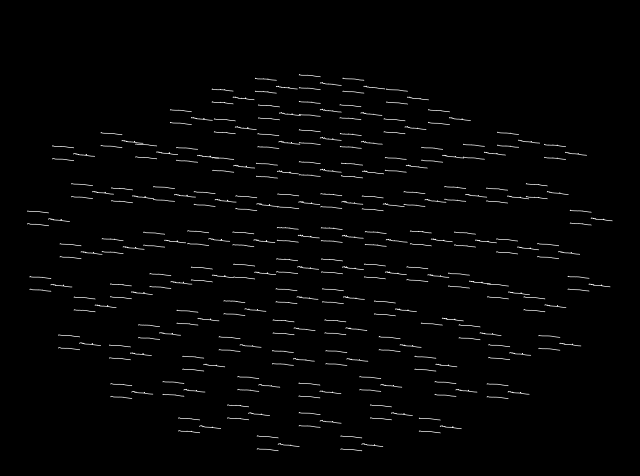

In [10]:
spectrum.plot_topo()

This plot is also interactive; hovering over each "thumbnail" plot will display the channel name in the bottom left of the plot window, and clicking on a thumbnail plot will create a second figure showing a larger version of the selected channel's spectral density (as if you had called `mne.time_frequency.Spectrum.plot` with that channel passed as `picks`).

By default, `mne.time_frequency.Spectrum.plot_topo` will show only the MEG channels if MEG channels are present; if only EEG channels are found, they will be plotted instead:

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>


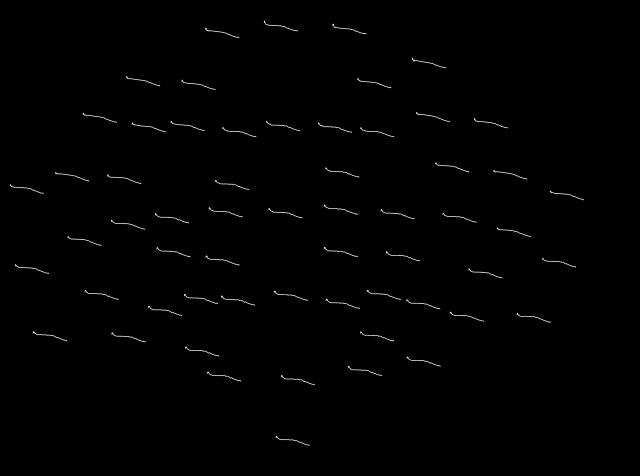

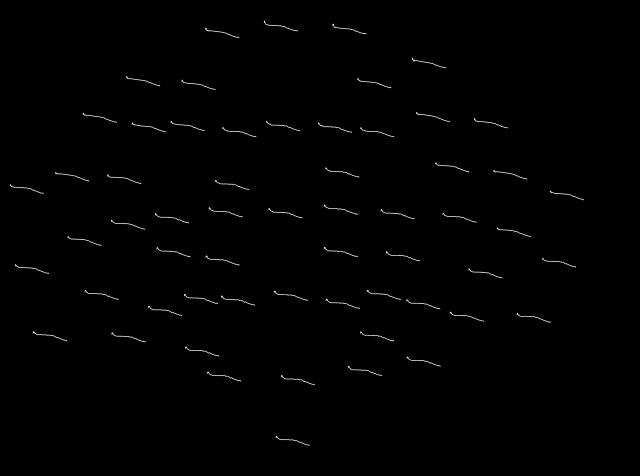

In [11]:
spectrum.pick('eeg').plot_topo()

<div class="alert alert-info"><h4>Note</h4><p>Prior to the addition of the :class:`~mne.time_frequency.Spectrum` class,
   the above plots were possible via::

       raw.plot_psd(average=True)
       raw.plot_psd_topo()
       raw.pick('eeg').plot_psd_topo()

   (there was no ``plot_topomap`` method for :class:`~mne.io.Raw`). The `~mne.io.Raw.plot_psd` and :meth:`~mne.io.Raw.plot_psd_topo` methods of `mne.io.Raw` objects are still provided to support legacy analysis scripts, but new code should instead use the `mne.time_frequency.Spectrum` object API.</p></div>


## Plotting sensor locations from ``Raw`` objects

The channel locations in a `~mne.io.Raw` object can be easily plotted with the `~mne.io.Raw.plot_sensors` method. A brief example is shown here; notice that channels in `raw.info['bads']` are plotted in red. More details and additional examples are given in the tutorial `tut-sensor-locations`.

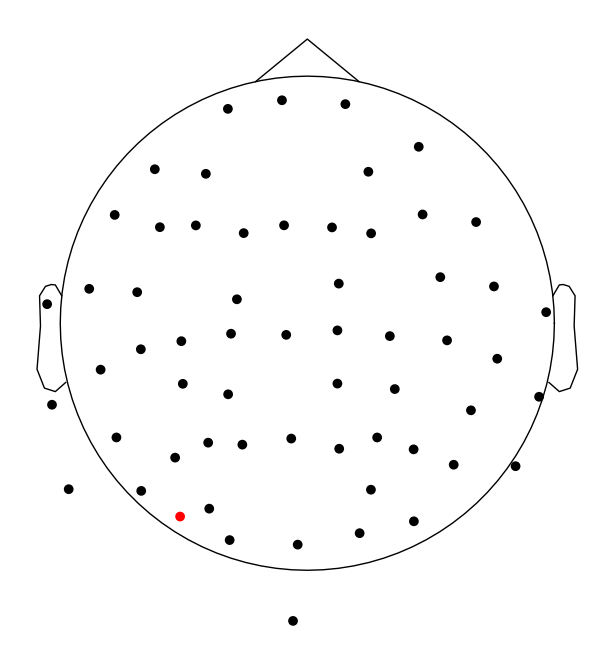

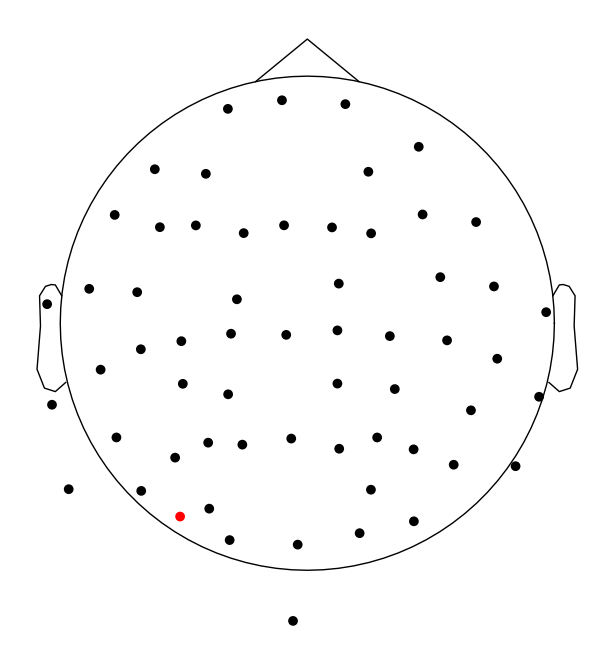

In [12]:
raw.plot_sensors(ch_type='eeg')


## Plotting Projectors from `Raw` Objects

* from the above `mne.io.read_raw_fif` plot, there are `projectors <projector>` included in the example `~mne.io.Raw` file (representing environmental noise in the signal, so it can later be "projected out" during preprocessing)

* These projectors can be visualized using the `~mne.io.Raw.plot_projs_topomap` method. 

* The default visualization shows:
  * one figure per channel type for which projectors are present, 
  * and each figure will have one subplot per projector

The three projectors in this file were only computed for magnetometers, so one figure with three subplots is generated. More details on working with and plotting projectors are given in `tut-projectors-background` and `tut-artifact-ssp`.

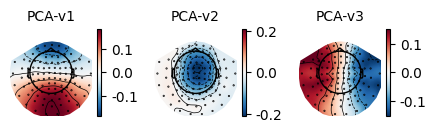

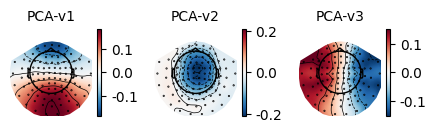

In [13]:
raw.plot_projs_topomap(colorbar=True)